<a href="https://colab.research.google.com/github/aliciaseidou/Forecasting_CA/blob/main/Copy_of_SeasonalForecastingCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANALYSIS OF MONTHLY BIKES JOURNEYS IN CORK

Susan Locatelli (C22342081)

Alicia Seidou (C22495584)


### INTRODUCTION

This project aims to analyze the time series of monthly bike journeys in Cork to identify patterns, trends, and potential predictive models, providing valuable insights for urban planning and transportation policy-making. Understanding how seasonal variations and other factors influence bike usage can help in designing better infrastructure and promoting cycling as a sustainable mode of transport.


### DATA SOURCE AND BACKGROUND

The dataset for this project, sourced from the Central Statistics Office via data.gov.ie, includes seasonally adjusted monthly bike journey figures. This dataset is crucial as it provides a comprehensive view of cycling dynamics in an urban setting, essential for our in-depth time series analysis. Its uniqueness and value stem from the detailed and continuous collection of data over several years.

### OBJECTIVE

To apply time series analysis techniques to the bike journeys data, aiming to uncover underlying patterns, develop predictive models, and forecast future trends in bike usage. This analysis will help in understanding the factors affecting cycling popularity and the impact of seasonal changes.

### DATA DESCRIPTION

The dataset includes monthly records of bike journeys, collected over several years, providing a granular view of the cycling trends in Cork. This time series data is pivotal for analyzing the seasonal impacts and other long-term trends in urban cycling behavior.

### METHODOLOGY

The analysis will employ various time series models (e.g., ARIMA, SARIMA) to identify, estimate, and validate the most fitting model, followed by forecasting future bike usage trends. This will include:

Decomposing the series to understand its seasonality and trend components.
Testing for stationarity and transforming the data if necessary.
Building and comparing several models to identify the best fit for predictive analytics.

### EXPECTED OUTCOMES

We anticipate developing a robust model that effectively captures the dynamics of bike usage patterns, enabling accurate predictions and offering insights into how different factors influence cycling trends. This model will assist in planning and improving cycling infrastructure and initiatives to promote biking as an eco-friendly transportation option.

### CONCLUSION

This project will contribute to a deeper understanding of cycling trends in Cork and assist in urban and transportation planning, showcasing the power of time series analysis in urban studies and public transportation research.


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose, STL
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.gofplots import qqplot
from statsmodels.tsa.stattools import adfuller
from tqdm import tqdm_notebook
from itertools import product
from typing import Union

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df = pd.read_csv('bikesSeasonalCork.csv')
df.tail()


,Date,Journeys
91,2022 August,11945
92,2022 September,11482
93,2022 October,9996
94,2022 November,7890
95,2022 December,5457


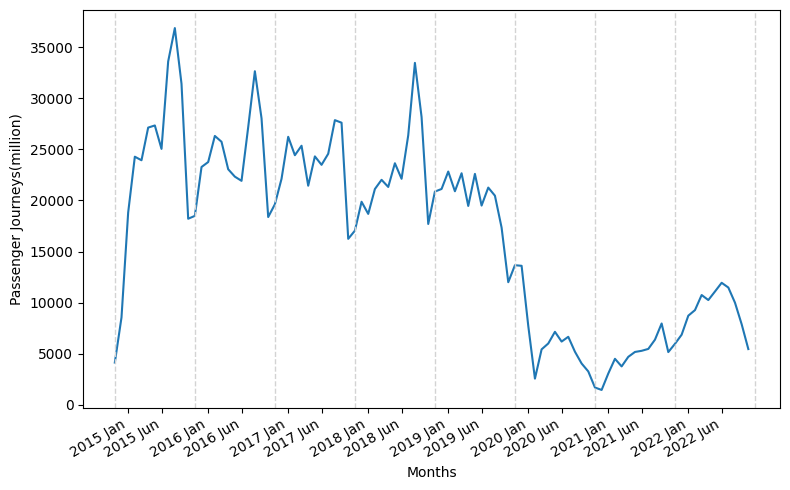

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df['Journeys'])
for i in np.arange(0, 97, 12):
    ax.axvline(x=i, linestyle='--', color='lightgrey', linewidth=1)
ax.set_xlabel('Months')
ax.set_ylabel('Passenger Journeys(million)')

plt.xticks(
    [2, 7, 14, 19, 26, 31, 38, 43, 50, 55, 62, 67, 74, 79, 86, 91],
    ['2015 Jan', '2015 Jun', '2016 Jan', '2016 Jun', '2017 Jan', '2017 Jun', '2018 Jan', '2018 Jun','2019 Jan', '2019 Jun', '2020 Jan','2020 Jun','2021 Jan','2021 Jun','2022 Jan', '2022 Jun'])

fig.autofmt_xdate()
plt.tight_layout()

*Figure 1*

### Visual Elements:

* **X-Axis Time (Months)**: It represents time, specifically laid out in a month-by-month format spanning from January 2015 to mid-2022. This sequential representation is crucial for observing the progression and trends over time, including seasonal variations and any anomalies due to external events.

* **Y-Axis Bike Journeys (Millions of Passenger Journeys)**: The Y-axis quantifies the bike journeys, scaled in millions of passenger journeys. This measurement provides a clear indicator of the volume of bike usage, making it easier to observe the intensity of usage across different times of the year.


### Interpretation

1. **Seasonal Variation**

 * **Peak Periods**: The bike usage consistently peaks around June each year, which can be attributed to more favorable weather conditions for cycling during the summer.
 * **Low Usage Periods**: The lowest points generally occur in the winter months, notably in January, reflecting the less appealing weather conditions for outdoor activities like cycling.

2. **Annual Trends and Anomalies**

 * **Annual Increase to Mid-Year**: Each year typically begins with lower usage, increasing towards the middle of the year, and then gradually decreasing towards the year's end.
 * **Anomaly in Trends**: The highest recorded peak appears in the middle of 2019, which might be influenced by specific local events, promotional campaigns encouraging cycling, or exceptionally good weather conditions.

 3. **Impact of External Events**

  * **Pandemic Impact**: A significant and sustained drop in bike journeys is evident from early 2020, coinciding with the global onset of the COVID-19 pandemic. This decline likely reflects the effects of lockdown measures, reduced commuting, and general public caution during the pandemic.

  * **Post-Pandemic Trends**: The data shows a slow recovery phase post-2020. While there is some increase in the number of journeys, the figures do not reach the pre-pandemic levels, suggesting a possibly enduring change in commuting and recreational behaviors.

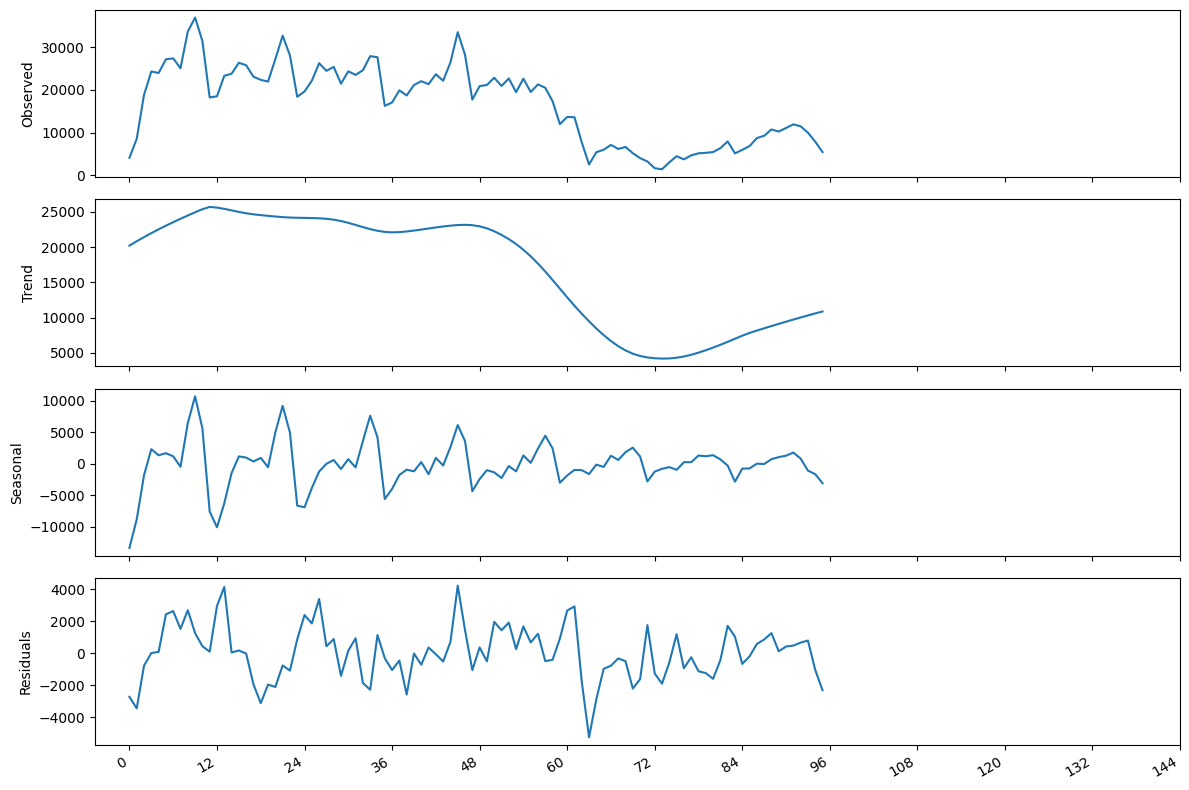

In [ ]:
decomposition = STL(df['Journeys'], period=12).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(12,8))

ax1.plot(decomposition.observed)
ax1.set_ylabel('Observed')

ax2.plot(decomposition.trend)
ax2.set_ylabel('Trend')

ax3.plot(decomposition.seasonal)
ax3.set_ylabel('Seasonal')

ax4.plot(decomposition.resid)
ax4.set_ylabel('Residuals')

plt.xticks(np.arange(0, 145, 12))

fig.autofmt_xdate()
plt.tight_layout()

*Figure 2*

The figure shows a decomposition of time series data for bike journeys using an STL (Seasonal and Trend decomposition using Loess) approach. This decomposition helps in understanding the underlying patterns in the data by separating it into three components: trend, seasonal, and residuals.



### 1.    Observed

This plot displays the original data as observed over time. The plot shows fluctuations in bike journey numbers with noticeable peaks and troughs, which appear to be seasonally influenced.

### 2. Trend

The trend component smooths out irregularities and shows the long-term movement in the data:

* **Initial Stability**: The trend is relatively stable at the start.

* **Decline Phase**: From around mid-2016, there's a gradual decline in the trend, indicating a decreasing number of bike journeys over this period.

* **Post-Pandemic Recovery**: Towards the latest part of the series, there is a slight upward trend suggesting a recovery or increase in bike journeys post-pandemic, although it doesn't return to initial levels.

### 3. Seasonal

The seasonal plot illustrates the repeating short-term cycle within the data:

* **Annual Cycle**: There's a clear annual seasonal pattern showing higher journeys during certain months each year and lower in others, consistent with typical weather-related cycling behavior.

* **Amplitude Stability**: The amplitude of seasonal variations remains relatively constant over time, indicating that the seasonal behavior hasn't significantly changed throughout the period, despite the overall trend.

### 4. Residuals

The residuals represent the noise or random variation in the data:

* **Variability**: Some points show significant spikes, indicating instances where the actual observations deviate from the modeled trend and seasonal patterns.

* **Outliers**: These spikes could be due to outliers or unmodeled influences (like specific events or abrupt changes in user behavior).


# Test for Stationarity

In [ ]:
ad_fuller_result = adfuller(df['Journeys'])

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.1372906035083101
p-value: 0.6999741461550625


* **ADF Statistic**: The more negative the ADF statistic, the stronger the rejection of the hypothesis that the series possesses a unit root (i.e., is non-stationary). In this case, the value of -1.1373 is not sufficiently negative to strongly reject the null hypothesis of non-stationarity.

* **p-value**: If the p-value is less than a chosen significance level (commonly set at 0.05), we reject the null hypothesis. A p-value of approximately 0.70 indicates a high probability of finding the observed results when the null hypothesis is true. In simpler terms, there is strong evidence that the series is non-stationary.

In [ ]:
df_diff = np.diff(df['Journeys'], n=1)

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -2.1521613834024036
p-value: 0.22406368340952604


* **ADF Statistic**: The ADF statistic is now more negative than before the differencing (-2.1522 compared to -1.1373 initially). This suggests that the differencing has helped in moving towards stationarity, but the statistic still isn't negative enough to strongly reject the null hypothesis of non-stationarity.

* **p-value**: The p-value has decreased significantly from 0.6999 to 0.2241, which shows improvement towards stationarity. However, it is still above the typical significance level of 0.05, meaning we cannot reject the null hypothesis of non-stationarity at the 95% confidence level.

In [ ]:
df_diff2 = np.diff(df_diff, n=1)

ad_fuller_result = adfuller(df_diff2)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -6.551643382206934
p-value: 8.820788876447091e-09


* **ADF Statistic**: The ADF statistic is now very negative (-6.5516), which is a strong indication that the null hypothesis of non-stationarity can be rejected. This significant negative value suggests that the time series has become stationary after the second differencing.

* **p-value**: The p-value is extremely low (8.82× 10^(-9)), far below the common threshold of 0.05. This implies that the probability of observing the data if the null hypothesis were true (i.e., the series is non-stationary) is virtually zero.

In [ ]:
df_diff_seasonal_diff = np.diff(df_diff, n=12)

ad_fuller_result = adfuller(df_diff_seasonal_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -9.446478954730255
p-value: 4.740615534801315e-16


* **ADF Statistic**: The statistic is highly negative, which strongly suggests that the null hypothesis of non-stationarity can be confidently rejected. This statistic indicates that the series, after undergoing both first and seasonal differencing, does not contain a unit root and is stationary.

* **p-value**: The very small p-value further supports the rejection of the null hypothesis. A p-value this small means there is an extremely low probability that the observed results could occur if the series were non-stationary.

# Split for testing & training

In [ ]:
df = pd.DataFrame(df)
y= df['Journeys']
train = y[:86]
test = y[86:]

print(len(train))
print(len(test))

86
10


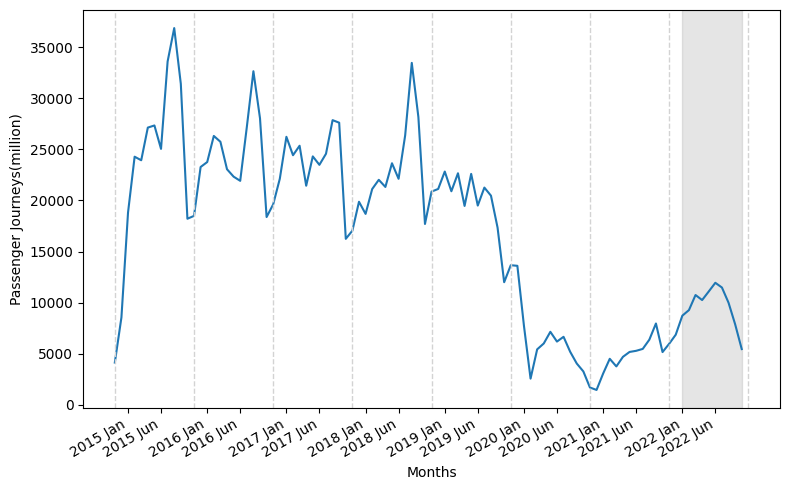

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df['Journeys'])
for i in np.arange(0, 97, 12):
    ax.axvline(x=i, linestyle='--', color='lightgrey', linewidth=1)
ax.set_xlabel('Months')
ax.set_ylabel('Passenger Journeys(million)')
ax.axvspan(86, 95, color='#808080', alpha=0.2)

plt.xticks(
    [2, 7, 14, 19, 26, 31, 38, 43, 50, 55, 62, 67, 74, 79, 86, 91],
    ['2015 Jan', '2015 Jun', '2016 Jan', '2016 Jun', '2017 Jan', '2017 Jun', '2018 Jan', '2018 Jun','2019 Jan', '2019 Jun', '2020 Jan','2020 Jun','2021 Jan','2021 Jun','2022 Jan', '2022 Jun'])

fig.autofmt_xdate()
plt.tight_layout()

*Figure 3*

### Visual Elements

* **X-axis(Time- Months)**: It is labeled with specific months ('Jan' and 'Jun') at approximately six-month intervals. This labeling provides a temporal scale that facilitates an easy understanding of the time distribution of data.

* **Y-axis (Passenger Journey- Millions)**: It shows the number of passenger journeys. It quantifies the bike usage, allowing for an assessment of the magnitude of journeys and comparison of different periods directly.

* **Shaded Area**: It highlights the segment of the graph designated as the testing set. This visually differentiates the training data from the testing data.



### Interpretation

* **Training Data**: Covers a broad range of conditions, including the pre-pandemic peak periods and the onset of the pandemic. This range is crucial for the model to learn both regular seasonal patterns and the impacts of unusual events.

* **Testing Data**: Includes the period of recovery from the pandemic, which will be essential to test if the model can adapt to or predict new trends influenced by recent events.

* **Modeling Considerations**: Given the evident seasonality and impact of the pandemic, any predictive model should account for seasonal variations and potential structural breaks or regime changes due to external shocks like the pandemic.

# ARIMA & SARIMA

In [ ]:
def optimize_ARIMA(train, order_list, d) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(train, order=(order[0], d, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue

        aic = model.aic
        results.append([order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
def optimize_SARIMA(train, order_list, d, D, s) -> pd.DataFrame:

    results = []

    for order in tqdm_notebook(order_list):
        try:
            model = SARIMAX(
                train,
                order=(order[0], d, order[1]),
                seasonal_order=(order[2], D, order[3], s),
                simple_differencing=False).fit(disp=False)
        except:
            continue
        nParams=sum(order)
        aic = model.aic
        results.append([nParams, order, aic])

    result_df = pd.DataFrame(results)
    result_df.columns = ['# of Params','(p,q,P,Q)', 'AIC']

    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)

    return result_df

In [ ]:
ps = range(0, 10, 1)
qs = range(0, 10, 1)
Ps = [0]
Qs = [0]

d = 2
D = 0
s = 12

ARIMA_order_list = list(product(ps, qs, Ps, Qs))

ARIMA_result_df = optimize_SARIMA(train, ARIMA_order_list, d, D, s)
ARIMA_result_df

  0%|          | 0/100 [00:00<?, ?it/s]

,# of Params,"(p,q,P,Q)",AIC
0,11,"(9, 2, 0, 0)",1610.262267
1,16,"(8, 8, 0, 0)",1611.058657
2,16,"(7, 9, 0, 0)",1612.163888
3,17,"(8, 9, 0, 0)",1612.472065
4,12,"(9, 3, 0, 0)",1612.886409
...,...,...,...
95,4,"(4, 0, 0, 0)",1645.610005
96,3,"(3, 0, 0, 0)",1647.398738
97,2,"(2, 0, 0, 0)",1658.641346
98,1,"(1, 0, 0, 0)",1671.729532


In [ ]:
ARIMA_model = SARIMAX(train, order=(9,2,2), simple_differencing=False)
ARIMA_model_fit = ARIMA_model.fit(disp=False)

print(ARIMA_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:               Journeys   No. Observations:                   86
Model:               SARIMAX(9, 2, 2)   Log Likelihood                -793.131
Date:                Wed, 08 May 2024   AIC                           1610.262
Time:                        13:54:08   BIC                           1639.432
Sample:                             0   HQIC                          1621.988
                                 - 86                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6542      0.135      4.858      0.000       0.390       0.918
ar.L2         -0.7474      0.139     -5.391      0.000      -1.019      -0.476
ar.L3          0.0391      0.130      0.301      0.7

### 1. Model Parameters and Fit

* **Autoregressive Coefficients (ar.L1 to ar.L9)**:

 * **ar.L1 (0.6542)**: This coefficient is significant with a p-value < 0.05, indicating a strong positive influence from the first lag. The immediate past value of "Journeys" has a substantial impact on the current value, which is typical in autoregressive models where the previous term is a strong predictor of the current term.

 * **ar.L2 (-0.7474)**: It indicates that the value two periods ago inversely affects the current value more strongly than the immediate past. This might suggest an oscillating pattern where increases are often followed by decreases.

 * **ar.L5 (-0.3627) and ar.L7 (-0.5705)**: Both coefficients are significant and negative, implying that the values at lags 5 and 7 negatively influence the current value, reinforcing the idea of a cyclical influence within the dataset.

 * **ar.L9 (-0.4990)**: Significant and negative, suggesting a similar cyclical pattern that reinforces the influences observed in other significant lags.

 These autoregressive components collectively suggest a complex dynamic in the "Journeys" time series, where past values have a mixed impact on the current value, likely indicating a combination of short-term and slightly longer-term cycles in the data.

* **Moving Average Coefficients (ma.L1 and ma.L2)**:

 * **ma.L1 (-1.5460) and ma.L2 (0.9018)**: Both coefficients are highly significant. The first moving average term suggests that the error from the previous period heavily influences the current period inversely, while the second term's positive coefficient indicates a correction to the previous error, smoothing out the predictions.


* **Model Fit Indicators**:

 * **Log Likelihood (-793.131)**: This value, though negative, provides insight into the likelihood of the model given the data.

 * **AIC (1610.262) and BIC (1639.432)**: These are key indicators of model performance that penalize free parameters. A lower AIC and BIC are preferred as they indicate a model with a better fit per complexity unit. Given the complexity of this model (9 AR terms and 2 MA terms), these values suggest that while the model captures a significant amount of the variance in the data, it may also be overfitting given the number of parameters involved.

### 2. Model Testing

* **Ljung-Box Test**: The p-value associated with the Ljung-Box test is 0.54, suggesting that there is no autocorrelation in the residuals at lag 1, which is good as it indicates the model residuals are random (white noise).

* **Jarque-Bera Test**: The test is significant (p = 0.00), indicating that the residuals do not follow a normal distribution, which could be a concern as it violates one of the assumptions of time series modeling.

* **Heteroskedasticity Test**: The test shows a p-value of 0.01, indicating the presence of heteroskedasticity, meaning the variance of the residuals is not constant across the time series.

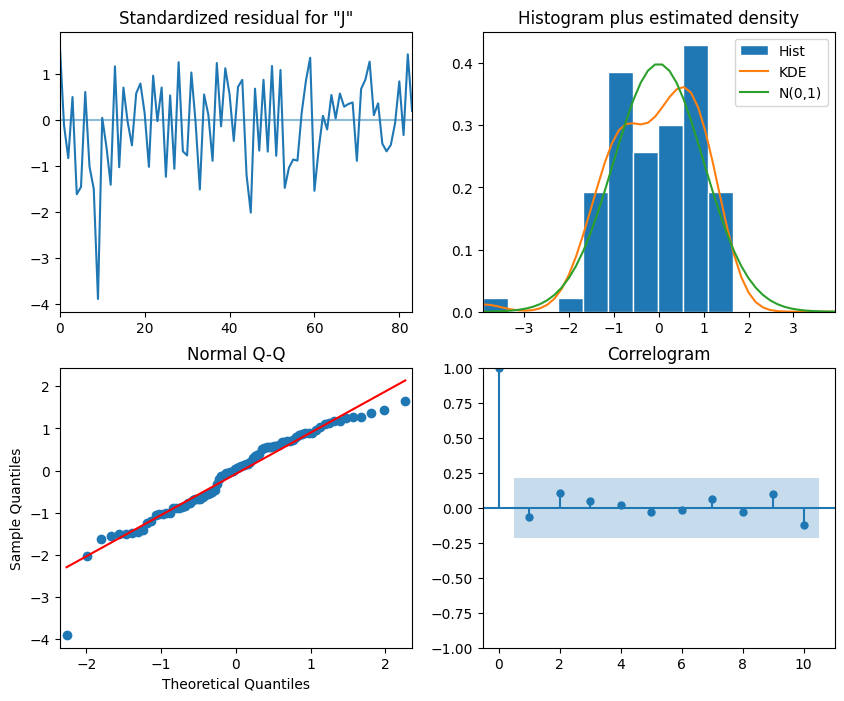

In [ ]:
ARIMA_model_fit.plot_diagnostics(figsize=(10,8));

*Figure 4*

### 1. Standardized Residuals Plot

* **Description**: This plot shows the standardized residuals of the model over time.

* **Interpretation**: Ideally the residuals have to be randomly distributed around the zero line, indicating that the model has captured all the information in the data, and what remains is random noise. The residuals seem fairly random, though there might be some periods of higher volatility.

### 2. Histogram plus Estimated Density Plot

* **Description**: This plot shows the distribution of the standardized residuals, overlaid with a kernel density estimate (KDE) and a normal distribution curve for comparison.

* **Interpretation**: The histogram and the KDE show the distribution of residuals. The closer this distribution resembles the green line (normal distribution), the better, as it suggests that the residuals are normally distributed. In this plot, the distribution of residuals shows some deviation from normality, indicated by the slight skewness in the histogram.

### 3. Normal Q-Q Plot

* **Description**: This plot compares the quantiles of the standardized residuals with the theoretical quantiles from a normal distribution.

* **Interpretation**: Points in this plot should ideally form a straight line. Deviations from the straight line at the ends suggest that the residuals have fat tails or outliers. In this plot, most points align well with the line except for a couple at the ends, indicating minor deviations from normality.

### 4. Correlogram (ACF Plot)

* **Description**: This autocorrelation plot shows the correlations of the residuals with their own lagged values up to 10 lags.

* **Interpretation**: For a well-fitting model, most of these autocorrelations should not be significantly different from zero (within the blue shaded area), indicating that the residuals are white noise. In the plot, all autocorrelations are within the confidence band, suggesting that there is no significant autocorrelation at any lag.

## Ljung-Box test

It is a statistical test used to determine whether any of a group of autocorrelations of a time series are different from zero.

1. **lb_stat (Ljung-Box Statistic)**: This statistic is a measure of the overall evidence against the null hypothesis that the residuals are independently distributed. A higher value suggests stronger evidence against the null hypothesis.

2. **lb_pvalue (P-value)**: This indicates the probability of observing the test statistic as extreme as, or more extreme than, what is observed under the null hypothesis of no autocorrelation. A low p-value (typically < 0.05) suggests rejecting the null hypothesis, indicating the presence of autocorrelation at that lag.

In [ ]:
residuals = ARIMA_model_fit.resid


acorr_ljungbox(residuals, np.arange(1, 11, 1))


,lb_stat,lb_pvalue
1,0.055132,0.814362
2,1.598261,0.449720
3,2.046946,0.562720
4,2.047442,0.727033
5,2.086576,0.837041
6,2.301669,0.889970
7,2.483419,0.928340
8,2.598160,0.956996
9,2.613292,0.977680
10,4.751411,0.907153


### Breakdown of Results

* **Lag 1**: There is no evidence of autocorrelation at lag 1. This suggests that the model residuals are random at this lag, indicating good model fit.

* **Lag 2**: Still no significant evidence of autocorrelation when considering both lags 1 and 2. The model appears to capture the autocorrelation structure up to two periods back effectively.

* **Lag 3 to 10**: With p-values remaining high (above 0.05), it becomes increasingly clear that the residuals are random across all tested lags, affirming that the model captures the time series dynamics well without leaving behind autocorrelation patterns.

In [ ]:
ps = range(0, 4, 1)
qs = range(0, 4, 1)
Ps = range(0, 4, 1)
Qs = range(0, 4, 1)

SARIMA_order_list = list(product(ps, qs, Ps, Qs))

d = 1
D = 1
s = 12

SARIMA_result_df = optimize_SARIMA(train, SARIMA_order_list, d, D, s)
SARIMA_result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,# of Params,"(p,q,P,Q)",AIC
0,7,"(2, 0, 2, 3)",16.000000
1,7,"(3, 1, 3, 0)",16.000000
2,6,"(0, 0, 3, 3)",1365.706067
3,7,"(1, 0, 3, 3)",1367.225731
4,7,"(0, 1, 3, 3)",1367.407629
...,...,...,...
250,6,"(3, 3, 0, 0)",1396.477877
251,5,"(2, 3, 0, 0)",1396.672930
252,2,"(0, 2, 0, 0)",1396.725343
253,4,"(2, 2, 0, 0)",1396.845490


In [ ]:
SARIMA_model = SARIMAX(train, order=(2,1,0), seasonal_order=(1,1,2,12), simple_differencing=False)
SARIMA_model_fit = SARIMA_model.fit(disp=False)

print(SARIMA_model_fit.summary())

                                        SARIMAX Results                                        
Dep. Variable:                                Journeys   No. Observations:                   86
Model:             SARIMAX(2, 1, 0)x(1, 1, [1, 2], 12)   Log Likelihood                -681.960
Date:                                 Wed, 08 May 2024   AIC                           1375.919
Time:                                         14:07:32   BIC                           1389.662
Sample:                                              0   HQIC                          1381.396
                                                  - 86                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0276      0.143     -0.194      0.847      -0.307       0

### Model Parameters and Fit

* **Autoregressive Coefficients (ar.L1, ar.L2)**.

 * **ar.L1 (-0.0276)**: The coefficient for the first lag is very small and not statistically significant (p-value = 0.847). This suggests that the immediate past value has little to no impact on the current value of "Journeys", which is unusual in time series models where past values typically predict future ones.

 * **ar.L2 (-0.1552)**: The coefficient for the second lag is also small and not statistically significant (p-value = 0.237). It suggests a slight negative influence from the value two periods ago on the current value, but this effect is not strong enough to be considered reliable.

* **Seasonal Autoregressive and Moving Average Coefficients**:

 * **ar.S.L12 (-0.9999)**: This significant negative coefficient for the seasonal autoregressive term at lag 12 (p-value = 0.000) indicates a strong negative effect from the same month in the previous year, likely reflecting a strong seasonal pattern in the data.

 * **ma.S.L12 (0.4142) and ma.S.L24 (-0.5851)**: The first seasonal moving average term is not significant (p-value = 0.307), suggesting it doesn't help much in correcting the prediction errors from the same season one year ago. The second term is significant (p-value = 0.015) and shows a moderate negative adjustment, enhancing the model's ability to smooth out seasonal variations.

* **Model Fit Indicators**:

 * **Log Likelihood (-681.960)**: The negative value here is typical for log likelihoods but could be improved. It reflects the model's likelihood given the data—higher (less negative) values are better.

 * **AIC (1375.919) and BIC (1389.662)**: These values are used to compare model fits, with lower values indicating a better balance of model fit and complexity. They suggest that the model, while somewhat effective, might be further optimized for a better fit.


### 2. Model Testing

* **Ljung-Box Test**: The results for this model show high p-values across multiple lags, consistently above 0.81, peaking at 0.98 for lag 9. This strongly suggests that there is no autocorrelation present in the residuals, affirming that the model residuals are behaving as white noise.

* **Jarque-Bera Test**: This test yielded a p-value of 0.62, indicating that the residuals reasonably follow a normal distribution. This result supports the assumption of normality in the time series analysis, suggesting that the model’s error terms do not violate this assumption.

* **Heteroskedasticity Test**: The test provided a p-value of 0.31, which does not suggest the presence of heteroskedasticity. This indicates that the variance of the residuals is constant, affirming that the model handles the variability in the data adequately.

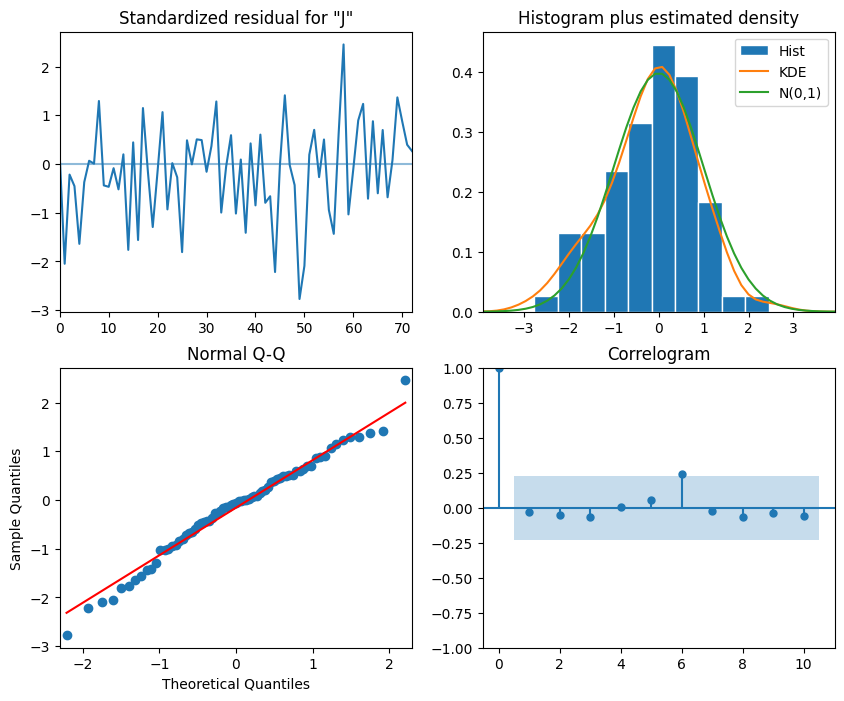

In [ ]:
SARIMA_model_fit.plot_diagnostics(figsize=(10,8));

*Figure 5*

### 1. Standardized Residuals Plot

* **Description**: This plot shows the standardized residuals over time.

* **Interpretation**: Residuals should ideally be random and centered around zero with no apparent patterns. In this plot, while the residuals mostly fluctuate around zero, there are some visible fluctuations, suggesting periods of higher volatility. However, there is no clear systematic pattern, which generally indicates that the model is capturing the major dynamics of the series.

### 2. Histogram plus Estimated Density Plot

* **Description**: This is a histogram of the residuals with a kernel density estimate (KDE) and a standard normal distribution overlaid.

* **Interpretation**: The KDE should closely follow the shape of the overlaid normal distribution if the residuals are normally distributed. In this case, the distribution of residuals appears slightly skewed and leptokurtic (having heavy tails), as indicated by the taller peak and fatter tails compared to the normal distribution. This suggests some deviations from normality.

### 3. Normal Q-Q Plot

* **Description**: This plot compares the quantiles of residuals with the theoretical quantiles from a normal distribution.

* **Interpretation**: Points lying on the line indicate normal distribution of residuals. There are some deviations, particularly in the tails, suggesting the presence of outliers or heavy tails in the distribution of residuals. This could imply that extreme values are more frequent than expected in a normal distribution.

### 4. Correlogram (ACF Plot)

* **Description**: This plot displays the autocorrelation of the residuals at different lags.

* **Interpretation**: Autocorrelations should be statistically insignificant (within the blue shaded area) if the residuals are white noise (indicating that the model has captured all the available information in the data). The plot shows that all autocorrelations are within the confidence bounds for all displayed lags, suggesting no significant autocorrelation and reinforcing that the residuals are random.

## Ljung-Box test

In [ ]:
residuals = SARIMA_model_fit.resid

acorr_ljungbox(residuals, np.arange(1, 11, 1))

### Breakdown of Results

* **Lag 1**: Significant autocorrelation at lag 1, suggesting that the model may not have fully captured the autocorrelation in the data at this lag.

* **Lag 2 to 8**: Statistics increase slightly, but the p-values fluctuate, staying mostly above 0.05 until lag 8, indicating no significant autocorrelation detected at these lags under the typical 0.05 threshold.

* **Lag 9 to 10**:There is a significant autocorrelation detected again at lags 9 and 10. This is particularly important as it suggests that the model's current specifications are not capturing all the cyclical patterns in the data, especially those occurring at these lags.

In [ ]:
train = df[:86]
test = df[86:]

print(len(train))
print(len(test))

In [ ]:
test['naive_seasonal'] = df['Journeys'].iloc[76:86].values
test

,Date,Journeys,naive_seasonal
86,2022 March,8726,3760
87,2022 April,9271,4698
88,2022 May,10748,5175
89,2022 June,10256,5287
90,2022 July,11093,5473
91,2022 August,11945,6377
92,2022 September,11482,7961
93,2022 October,9996,5163
94,2022 November,7890,5972
95,2022 December,5457,6864


### Observations

1. **General Trend**: There is a clear discrepancy between the forecasted values and the actual journeys. The predicted numbers are consistently lower than the actuals, indicating that the naive seasonal method may not fully capture the trend and variance in the data over this period.

2. **Possible Reasons for Discrepancy**:

 * **Trend or Growth**: If there is a general upward trend or growth in the dataset that this method does not account for, the naive seasonal forecast will systematically underestimate the values.

 * **Volatility and External Factors**: Significant variations or external events affecting the data in the forecast period but not present in the previous season could lead to inaccuracies.

 * **Seasonal Patterns and Shifts**: Changes in seasonal patterns from year to year


In [ ]:
ARIMA_pred = ARIMA_model_fit.get_prediction(86, 95).predicted_mean

test['ARIMA_pred'] = ARIMA_pred
ARIMA_pred

86     6788.042286
87     7694.697746
88    10633.380144
89    11819.455867
90    13373.674020
91    13594.068980
92    14355.891522
93    15059.187209
94    15373.830297
95    14880.603334
Name: predicted_mean, dtype: float64

### Analysis of ARIMA Predictions

1. **Trend Observation**: The predictions generally show an increasing trend from March to November, with a slight decline in December. This trend could reflect seasonal patterns captured by the model, where mid-year to late-year months typically have higher journey counts possibly due to weather, holidays, or other seasonal factors.

2. **Comparison with Historical Data**: If we compare these predictions to historical data or known trends in the data set, we might observe that the model anticipates a regular seasonal increase which then slightly tapers off towards the end of the year.

3. **Utility of Predictions**: These predictions can be used for planning and decision-making purposes. For instance, if the predicted values are used by a transportation department, they might prepare for increased passenger journeys during the months forecasted to have higher activity.

In [ ]:
SARIMA_pred = SARIMA_model_fit.get_prediction(86,95 ).predicted_mean

test['SARIMA_pred'] = SARIMA_pred
test

,Date,Journeys,naive_seasonal,ARIMA_pred,SARIMA_pred
86,2022 March,8726,3760,6788.042286,6578.785036
87,2022 April,9271,4698,7694.697746,5894.550233
88,2022 May,10748,5175,10633.380144,6647.718705
89,2022 June,10256,5287,11819.455867,6457.053343
90,2022 July,11093,5473,13373.674020,7696.239552
91,2022 August,11945,6377,13594.068980,6842.746090
92,2022 September,11482,7961,14355.891522,8033.593273
93,2022 October,9996,5163,15059.187209,8939.135279
94,2022 November,7890,5972,15373.830297,8154.960637
95,2022 December,5457,6864,14880.603334,4039.374158


### Analysis of SARIMA predictions

1. **General Trend**: SARIMA predictions often provide a smoother forecast compared to ARIMA, potentially capturing seasonal fluctuations more effectively. However, the SARIMA forecast seems to underestimate the actual values across several months, particularly in the peak mid-year months like June and July, where tourism or seasonal activities might spike.

2. **Performance in Off-Peak Months**: In months like November and December, SARIMA and ARIMA forecasts exceed actual values. The discrepancy in December is notable where SARIMA significantly underpredicts the journeys, suggesting it might not fully account for end-of-year declines, possibly due to unmodeled external factors like weather or holiday effects.

### Comparing ARIMA predictions with SARIMA predictions

1. **Trend and Seasonality Capture**:

 * **ARIMA**: The ARIMA model generally predicts higher values than the SARIMA model. It appears to consistently overestimate relative to the actual data across several months, particularly in the latter half of the year (from July to November).

 * **SARIMA**: The SARIMA model, while still not perfectly aligning with the actuals, tends to offer predictions closer to the actual values during several months. However, it notably underpredicts in December, possibly due to inadequate capturing of the sharp seasonal decline.

2. **Performance in Capturing Peaks**:

 * Both models struggle with the highest and lowest values in the dataset. For instance, both models overpredict in November and December when the actual values significantly drop. This could indicate that both models may not be fully accounting for factors that cause sharp declines in these months.

3. **Accuracy and Consistency**:

 * **ARIMA**: Seems less sensitive to seasonal declines and shows a pattern of overestimation. This could be due to the lack of a seasonal component, which makes it less responsive to seasonal fluctuations that are prominent in this data.

 * **SARIMA**: Exhibits closer adherence to actual values in mid-year months but underestimates during both peak and off-peak seasons, suggesting that while the seasonal component helps, parameter adjustments might be needed to improve accuracy.

In summary, while SARIMA generally seems to perform better in capturing the actual trends due to its incorporation of seasonal patterns, both models exhibit some limitations in accurately forecasting throughout the year.

#MAPE

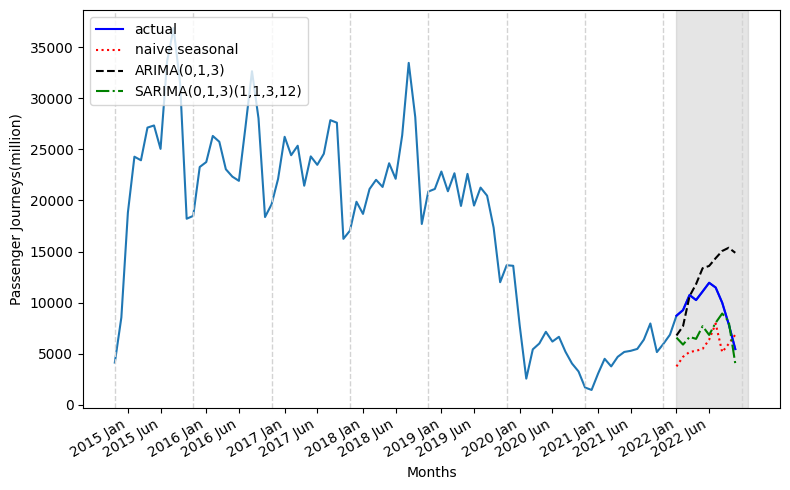

In [ ]:
fig, ax = plt.subplots(figsize=(8, 5))

ax.plot(df['Journeys'])
ax.plot(test['Journeys'], 'b-', label='actual')
ax.plot(test['naive_seasonal'], 'r:', label='naive seasonal')
ax.plot(test['ARIMA_pred'], 'k--', label='ARIMA(0,1,3)')
ax.plot(test['SARIMA_pred'], 'g-.', label='SARIMA(0,1,3)(1,1,3,12)')

ax.set_xlabel('Date')
ax.set_ylabel('Passenger Journeys(million)')
ax.axvspan(86, 97, color='#808080', alpha=0.2)

ax.legend(loc=2)
for i in np.arange(0, 97, 12):
    ax.axvline(x=i, linestyle='--', color='lightgrey', linewidth=1)
ax.set_xlabel('Months')
ax.set_ylabel('Passenger Journeys(million)')

plt.xticks(
    [2, 7, 14, 19, 26, 31, 38, 43, 50, 55, 62, 67, 74, 79, 86, 91],
    ['2015 Jan', '2015 Jun', '2016 Jan', '2016 Jun', '2017 Jan', '2017 Jun', '2018 Jan', '2018 Jun','2019 Jan', '2019 Jun', '2020 Jan','2020 Jun','2021 Jan','2021 Jun','2022 Jan', '2022 Jun'])

fig.autofmt_xdate()
plt.tight_layout()

*Figure 6*

### Visual Elements:

1. **Axes**:

 * **X-Axis (Months)**: Labels are spaced unevenly to correspond to specific time points (mostly January and June of each year), providing a clear view of how models perform across different seasons and years.

 * **Y-Axis (Passenger Journeys in millions)**: Indicates the volume of passenger journeys, allowing for an assessment of model performance in absolute terms.

2. **Lines Representing Different Models**:

 * **Actual Data (Blue Solid Line)**: Represents the true passenger journeys recorded over the period. It provides a basis for comparison with the predictions made by various forecasting models.

 * **Naive Seasonal Forecast (Red Dotted Line)**: Uses a simple method by taking the same month from the previous year to predict the current year's value. Its dotted style makes it distinct and easy to differentiate from other predictions.

 * **ARIMA Model (Black Dashed Line)**: A non-seasonal ARIMA model is shown as a dashed black line. It does not capture the seasonal patterns but shows trends and reactions to changes in the data over a non-seasonal period.

 * **SARIMA Model (Green Dash-Dot Line)**: This line, with a dash-dot pattern, shows the forecast from a Seasonal ARIMA model, which includes both non-seasonal and seasonal factors in its calculations.

### Observations

1. **Trend and Seasonality**: The actual data shows a clear seasonal pattern with peaks typically in the middle of each year, likely corresponding to summer months when travel peaks. There are also noticeable drops, particularly sharp in 2020, likely due to the impact of COVID-19 on travel behaviors.

2. **Model Performance**

 * **Naive Seasonal**: The naive seasonal forecasts capture the seasonality somewhat but do not adjust to the level change seen in 2020, continuing to overestimate during the pandemic's impact. This model’s simplicity can capture basic seasonal patterns but not abrupt changes due to external factors.

 * **ARIMA**: The ARIMA model forecasts appear to lag the actual values slightly and fail to capture the seasonal peaks and troughs adequately. This model is not tuned to pick up seasonal variations, which is evident from its performance during seasonal highs and lows.

 * **SARIMA**: The SARIMA model's predictions are closer to the actual values than the other models, particularly adjusting better to the variance and the seasonality in the data. It shows improvements over the ARIMA model by incorporating seasonal differences, which helps it respond to both the trend and the cyclic nature of the dataset.





In [ ]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape_naive_seasonal = mape(test['Journeys'], test['naive_seasonal'])
mape_ARIMA = mape(test['Journeys'], test['ARIMA_pred'])
mape_SARIMA = mape(test['Journeys'], test['SARIMA_pred'])

print(mape_naive_seasonal, mape_ARIMA, mape_SARIMA)

43.292103743730365 43.310945567160694 27.949467522169858


### Analysis and Interpretation of MAPE Results

1. **Naive Seasonal Model**:

 * **MAPE**: 43.29%

 * This value indicates that, on average, the forecast from the naive seasonal model deviates from the actual values by about 43.29%. Given that this model simply repeats past seasonal data, its relatively high error underscores its limitations, particularly in adjusting to changes or trends that differ from the past year.

2. **ARIMA Model**:

 * **MAPE**: 43.31%

 * The ARIMA model's MAPE is almost identical to that of the naive seasonal model, suggesting that while it may capture non-seasonal trends or cycles better than the naive model, it still lacks in performance, particularly in handling the seasonal fluctuations effectively, which are evident in this dataset.

3. **SARIMA Model**:

 * **MAPE**: 27.95%

 * Significantly lower than the other two models, the SARIMA model's MAPE indicates a much better fit. The inclusion of seasonal elements in the SARIMA model clearly enhances its forecasting accuracy, making it more adaptable to both non-seasonal and seasonal changes in the data.

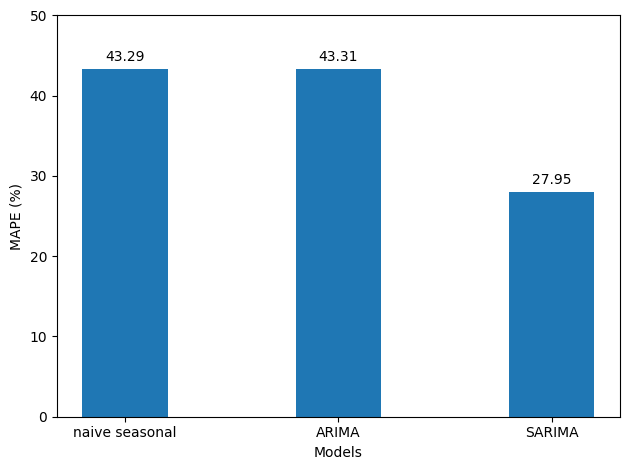

In [ ]:
fig, ax = plt.subplots()

x = ['naive seasonal', 'ARIMA', 'SARIMA']
y = [mape_naive_seasonal, mape_ARIMA, mape_SARIMA]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Models')
ax.set_ylabel('MAPE (%)')
ax.set_ylim(0, 50)

for index, value in enumerate(y):
    plt.text(x=index, y=value + 1, s=str(round(value,2)), ha='center')

plt.tight_layout()

*Figure 7*

### Visual Elements:

1. **Axes**:

 * **X-axis (Models)**: Labels on the x-axis identify which bar corresponds to which forecasting model. This categorical labeling is straightforward and enhances clarity, ensuring that viewers can easily attribute the displayed values to the respective models.

 * **Y-axis (MAPE %)**: The y-axis is scaled from 0% to 50%, providing a range that frames the MAPE values effectively. This scaling choice is crucial as it sets the context for evaluating model performance - the lower the MAPE, the better the model's predictive accuracy.

2. ** Bar Elements**:

 * Each bar represents a different forecasting model: naive seasonal, ARIMA, and SARIMA.

 * The height of each bar corresponds to the MAPE percentage, which quantifies the average percentage error in the forecasts provided by each model.

### Interpretation

1. **MAPE Values**:

 * **Naive Seasonal**: MAPE of 43.29%. This model, which assumes the same pattern will repeat from the previous year, has a high error rate. This suggests that the model is relatively inaccurate, possibly due to changes in patterns year-over-year that the model cannot adapt to.

 * **ARIMA**: MAPE of 43.31%. Surprisingly, this model performs almost identically in terms of error rate to the naive seasonal model, indicating that despite incorporating more sophisticated statistical techniques for non-seasonal trends, it fails to capture the seasonal fluctuations effectively.

 * **SARIMA**: MAPE of 27.95%. The significantly lower MAPE here reflects better overall prediction accuracy, likely due to the model's ability to account for both non-seasonal and seasonal factors in the data.

2. **Model Comparison**:

 * The **SARIMA model** shows a clear advantage over the other two models in terms of prediction accuracy, as evidenced by its lower MAPE value. This indicates that the SARIMA model's incorporation of seasonal adjustments provides a significant improvement in forecasting the data series.

 * Both **naive seasonal and ARIMA models** exhibit high error rates, suggesting that they may not be suitable when the data exhibits strong seasonal patterns, as these models either oversimplify the seasonal component (naive seasonal) or fail to account for it entirely (ARIMA).

## Conclusion

This comprehensive analysis underscores the superiority of the SARIMA model in capturing seasonal trends and adapting to unexpected changes, affirming its value for enhancing forecasting accuracy in passenger journey predictions and guiding future model optimization and strategic decision-making.